# Monte Carlo Data

In [ ]:
# %load ../../style.py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import colorConverter
from matplotlib import rcParams
import seaborn as sns
from scipy.optimize import curve_fit

sns.set(style='ticks', palette='Set2') 
sns.despine()

fontsize_labels = 22    # size used in latex document
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = True
rcParams['figure.autolayout'] = True
rcParams['font.size'] = fontsize_labels
rcParams['ax.labelsize'] = fontsize_labels
rcParams['xtick.labelsize'] = fontsize_labels
rcParams['ytick.labelsize'] = fontsize_labels
rcParams['legend.fontsize'] = fontsize_labels
rcParams['axes.titlesize'] = fontsize_labels
rcParams['figure.figsize'] = (3*6.2, 3*3.83)  


In [22]:
from numpy.linalg import inv as inverse
import sympy as sy
import prettyplotlib as ppl
from scipy.optimize import curve_fit
import itertools
import pickle

chars=["Electrons","Muons","Taons","Hadrons"]

# Rescaling the number of events to fit the branching ratio

In [3]:
# Loading of the data. We saved the ROOT files before as .npy files

ee = np.load("data/ee.npy")
mm = np.load("data/mm.npy")
tt = np.load("data/tt.npy")
qq = np.load("data/qq.npy")
ff = [ee,mm,tt,qq]
rescale = False
if rescale == True:
    print([len(r) for r in ff])
    chars=["Electrons","Muons","Taons","Hadrons"]
    br = [3.3,3.3,3.3,70]

    # Making all leptons equal branching ratio
    new_ee = []
    while len(ee)+len(new_ee)<len(mm):
        new_ee += [ee[np.random.randint(len(ee))]]
    ee = np.append(ee,new_ee) 

    new_tt = []
    while len(tt)+len(new_tt)<len(mm):
        new_tt += [tt[np.random.randint(len(tt))]]
    tt = np.append(tt,new_tt)   

    # Adopting a branching ratio of 70 for qq
    len_qq = len(ee)/3.3 *70
    multiplier = int(np.floor(len_qq / len(qq)))-1
    qq = np.append(qq,[qq]*multiplier)

    new_qq = []
    while len(qq)+len(new_qq)< len_qq:
        new_qq += [qq[np.random.randint(len(qq))]]
    qq = np.append(qq,new_qq)

    ff = [ee,mm,tt,qq]
    print([len(r) for r in ff])

## 1. Cleaning up electron data

In [4]:
costhetamin = -0.9
costhetamax = 0.9
ff = [u[(u["Pcharged"]!=0)*np.logical_or((u["cos_thet"]>costhetamin)*(u["cos_thet"]<costhetamax),[ui==3]*len(u))] for ui,u in enumerate(ff)]

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


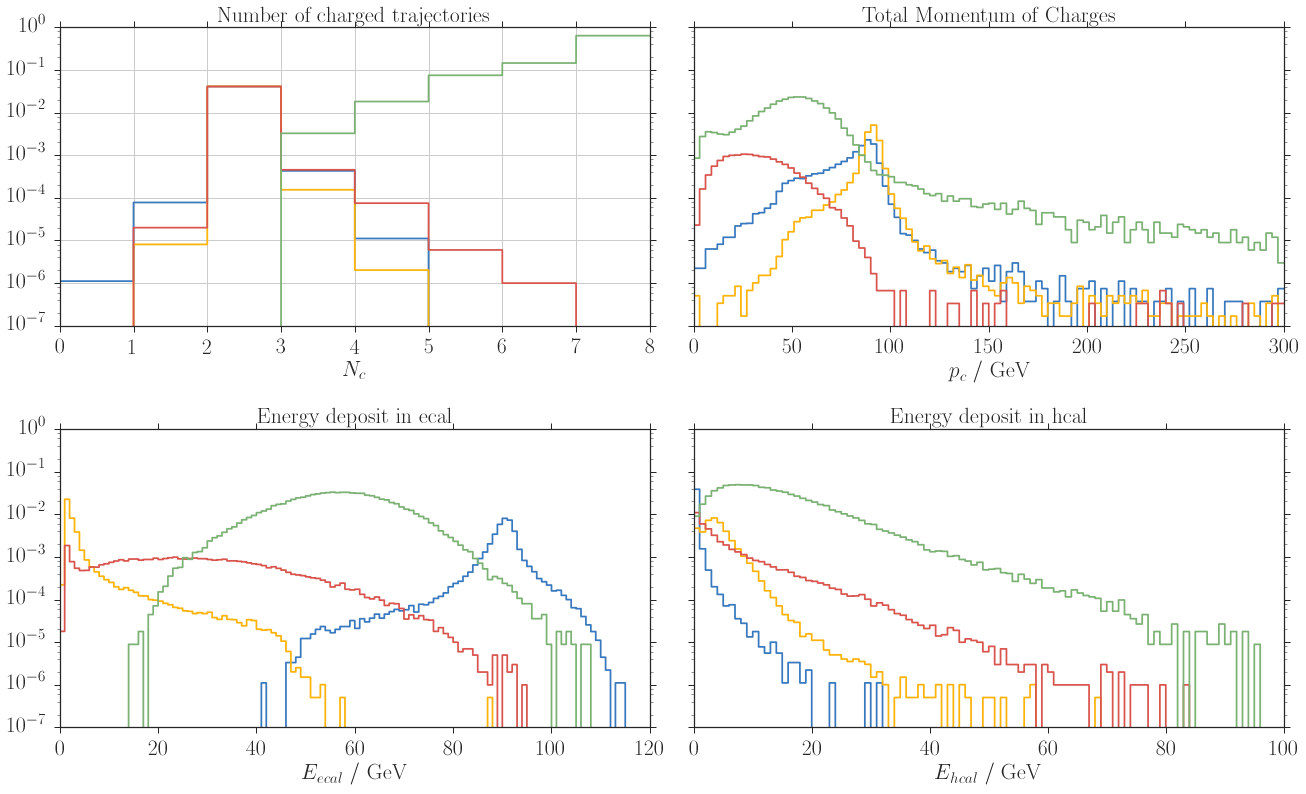

In [17]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True)
br = [3.3,3.3,3.3,70]
br/=np.sum(br)

def sum_P(var,len_, range_,ax,cond = [], style = "-"):
    P_all = []
    
    for ur,r in enumerate(ff):
        if cond == []:
            subset = (r[var]==r[var])
        else:
            subset = cond(r)
        P, edges = np.histogram(r[var][subset],len_,range =range_ , density = True)
        P*= br[ur]
        P_all += [P]
        
    width = edges[1]
    colors = ["windows blue", "amber", "pale red", "faded green", "dusty purple"]
       
    palette = itertools.cycle(sns.xkcd_palette(colors) )
    for i in range(4):
        edges2 = []
        P_all2 = []
        for k in range(len(edges[1:])):
            edges2 += [edges[k]]
            edges2 += [edges[k]+width*0.9999]
            P_all2 += [P_all[i][k]]
            P_all2 += [P_all[i][k]]
        ax.plot(edges2,P_all2,style,color=next(palette),label=chars[i])   
    #P_all = np.array(P_all)
    #p1 = ax.bar(edges[1:], P_all[0,:],  1, color=next(palette) )
    #p2 = ax.bar(edges[1:], P_all[1,:],  1, color=next(palette),  bottom=P_all[0,:])
    #p3 = ax.bar(edges[1:], P_all[2,:],  1, color=next(palette),  bottom=sum([P_all[0,:],P_all[1,:]]))
    #p4 = ax.bar(edges[1:], P_all[3,:],  1, color=next(palette),  bottom=sum([P_all[0,:],P_all[1,:],P_all[2,:]]))

cond = lambda r: (r["cos_thru"] < 0.9) * (r["cos_thru"] >  -0.9)
sum_P("Ncharged",8,(0,8),ax1)
#sum_P("Ncharged",8,(0,8),ax1,cond,style = ".")
ax1.set_title("Number of charged trajectories")
ax1.set_xlabel("$N_c$")
ax1.set_yscale("log", nonposy = "clip")
ax1.grid(True)
#ax1.legend(loc=2)

sum_P("Pcharged",100,(0,300),ax2)    
#sum_P("Pcharged",100,(0,300),ax2,cond,style = ".") 
ax2.set_title("Total Momentum of Charges")
ax2.set_xlabel("$p_c$ / GeV")
ax2.set_yscale("log")

sum_P("E_ecal",120,(0,120),ax3)
#sum_P("E_ecal",120,(0,120),ax3,cond,style = ".")
ax3.set_title("Energy deposit in ecal")
ax3.set_xlabel("$E_{ecal}$ / GeV")
ax3.set_yscale("log")

sum_P("E_hcal",100,(0,100),ax4)  
#sum_P("E_hcal",100,(0,100),ax4,cond,style= ".")
ax4.set_title("Energy deposit in hcal")
ax4.set_xlabel("$E_{hcal}$ / GeV")
ax4.set_yscale("log")
#plt.savefig("../figures/variables.pdf")
plt.show()

This plot justifies the cut of all $\cos [thru] < 0.9$ and  $\cos [thru] >  -0.9$

In [66]:
sum(sum((ff[k]["cos_thru"] < 0.9) * (ff[k]["cos_thru"] >  -0.9)) for k in range(4))/sum((len(ff[k])) for k in range(4))

0.85910212897253935

/usr/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


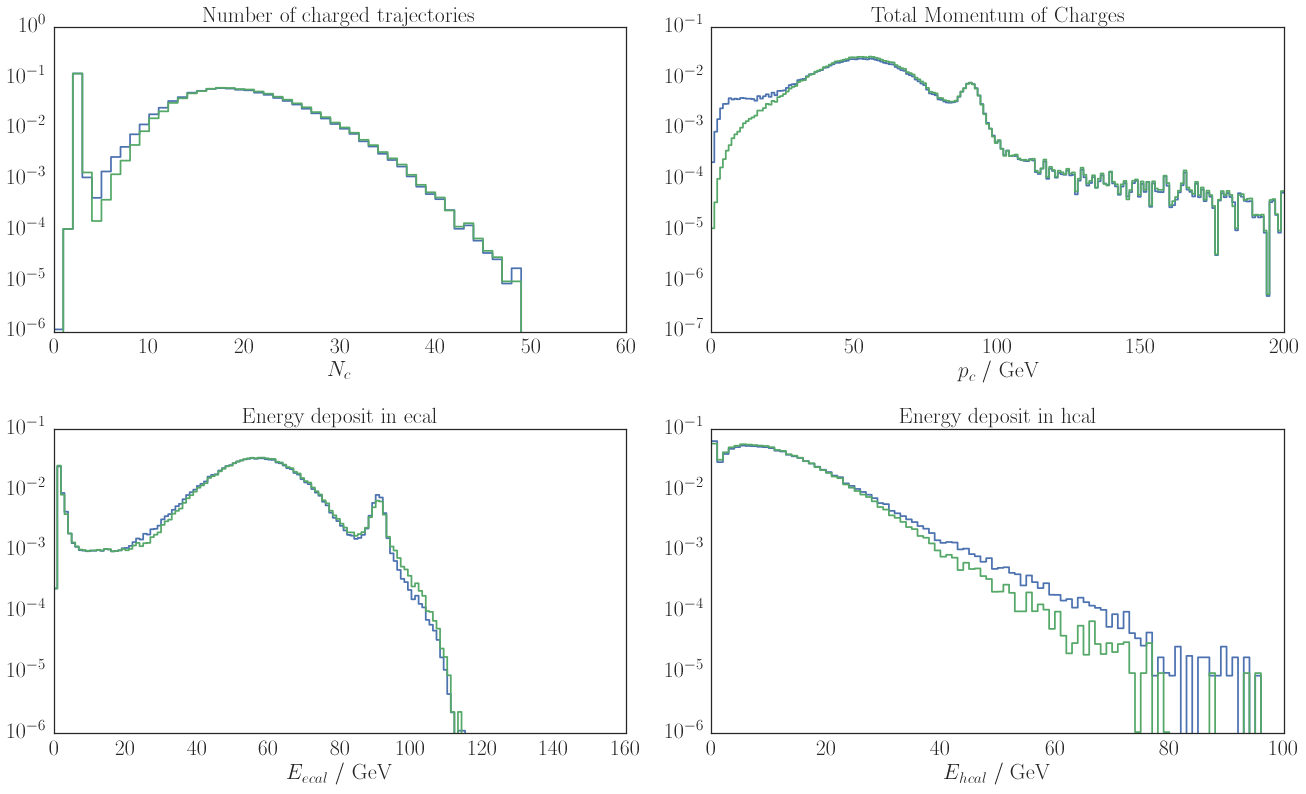

In [36]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

br = [3.3,3.3,3.3,70]
br/=np.sum(br)

def sum_P2(var,len_, range_,ax , cond = []):
    P_all = np.zeros(len_)
    
    for ur,r in enumerate(ff):
        if cond == []:
            subset = (r[var]==r[var])
        else:
            subset = cond(r)
        P, edges = np.histogram(r[var][subset],len_,range =range_ , density = True)
        P*= br[ur]
        P_all += P       
    width = edges[1]
    colors = ["windows blue", "amber", "pale red", "faded green", "dusty purple"]
       
    #palette = itertools.cycle(sns.xkcd_palette(colors) )
    P_all2 = []
    edges2 = []
    for k in range(len_):
        edges2 += [edges[k]]
        edges2 += [edges[k]+width*0.9999]
        P_all2 += [P_all[k]]
        P_all2 += [P_all[k]]
    ax.plot(edges2,P_all2)   
    #P_all = np.array(P_all)
    #p1 = ax.bar(edges[1:], P_all[0,:],  1, color=next(palette) )
    #p2 = ax.bar(edges[1:], P_all[1,:],  1, color=next(palette),  bottom=P_all[0,:])
    #p3 = ax.bar(edges[1:], P_all[2,:],  1, color=next(palette),  bottom=sum([P_all[0,:],P_all[1,:]]))
    #p4 = ax.bar(edges[1:], P_all[3,:],  1, color=next(palette),  bottom=sum([P_all[0,:],P_all[1,:],P_all[2,:]]))

cond = lambda r: (r["cos_thru"] < 0.9) * (r["cos_thru"] >  -0.9)
sum_P2("Ncharged",60,(0,60),ax1)
sum_P2("Ncharged",60,(0,60),ax1, cond)
ax1.set_title("Number of charged trajectories")
ax1.set_xlabel("$N_c$")
ax1.set_yscale("log")
ax1.legend(loc=2)

sum_P2("Pcharged",200,(0,200),ax2)
sum_P2("Pcharged",200,(0,200),ax2,cond)
ax2.set_title("Total Momentum of Charges")
ax2.set_xlabel("$p_c$ / GeV")
ax2.set_yscale("log")

sum_P2("E_ecal",150,(0,150),ax3)
sum_P2("E_ecal",150,(0,150),ax3,cond)
ax3.set_title("Energy deposit in ecal")
ax3.set_xlabel("$E_{ecal}$ / GeV")
ax3.set_yscale("log")

sum_P2("E_hcal",100,(0,100),ax4)
sum_P2("E_hcal",100,(0,100),ax4,cond) 
ax4.set_title("Energy deposit in hcal")
ax4.set_xlabel("$E_{hcal}$ / GeV")
ax4.set_yscale("log")

plt.show()

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


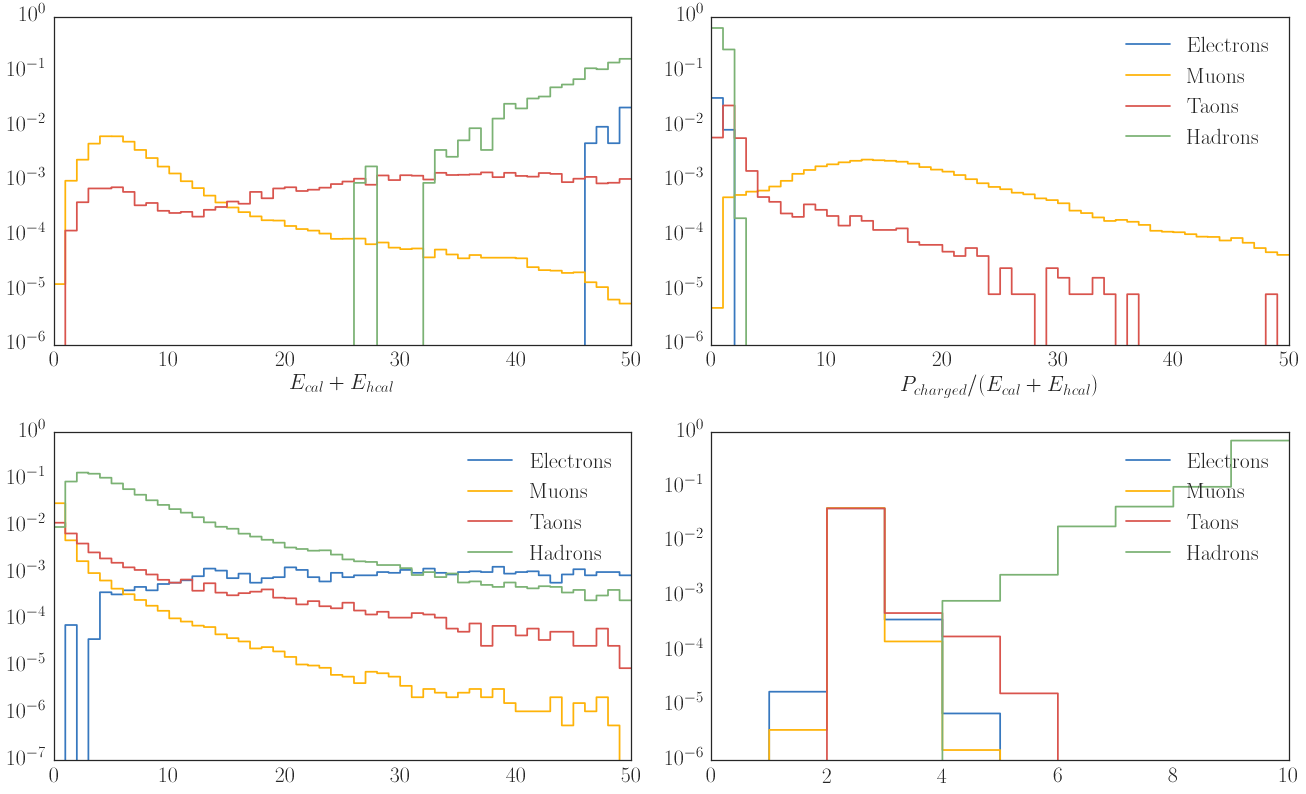

In [79]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
br = [3.3,3.3,3.3,70]
br/=np.sum(br)

def sum_P(func,len_, range_,ax,cond = []):
    P_all = []
    
    for ur,r in enumerate(ff):
        if cond == []:
            subset = (r["Pcharged"]==r["Pcharged"])
        else:
            subset = cond(r)
        P, edges = np.histogram(func(r[subset]),len_,range =range_ , density = True)
        P*= br[ur]
        P_all += [P]
        
    width = edges[1]
    colors = ["windows blue", "amber", "pale red", "faded green", "dusty purple"]
       
    palette = itertools.cycle(sns.xkcd_palette(colors) )
    for i in range(4):
        edges2 = []
        P_all2 = []
        for k in range(len(edges[1:])):
            edges2 += [edges[k]]
            edges2 += [edges[k]+width*0.9999]
            P_all2 += [P_all[i][k]]
            P_all2 += [P_all[i][k]]
        ax.plot(edges2,P_all2,color=next(palette),label=chars[i])   
    #P_all = np.array(P_all)
    #p1 = ax.bar(edges[1:], P_all[0,:],  1, color=next(palette) )
    #p2 = ax.bar(edges[1:], P_all[1,:],  1, color=next(palette),  bottom=P_all[0,:])
    #p3 = ax.bar(edges[1:], P_all[2,:],  1, color=next(palette),  bottom=sum([P_all[0,:],P_all[1,:]]))
    #p4 = ax.bar(edges[1:], P_all[3,:],  1, color=next(palette),  bottom=sum([P_all[0,:],P_all[1,:],P_all[2,:]]))

    
cond = lambda r: (r["Pcharged"] > 50) * (r["Pcharged"] < 100)
Q = lambda r: r["E_ecal"]+r["E_hcal"]
#sum_P(Q,50,(0,50),ax1)
sum_P(Q,50,(0,50),ax1,cond)
#ax1.set_title("$E_{cal} + E_{hcal}$")
ax1.set_xlabel("$E_{cal} + E_{hcal}$")
ax1.set_yscale("log")
#ax1.legend()

Q = lambda r: r["Pcharged"]/(r["E_ecal"]+r["E_hcal"])
sum_P(Q,50,(0,50),ax2,cond)
ax2.set_xlabel("$P_{charged} / (E_{cal} + E_{hcal})$")
ax2.set_yscale("log")
ax2.legend() 

Q = lambda r: r["E_ecal"]/r["E_hcal"]
sum_P(Q,50,(0,50),ax3,cond)
#ax3.set_xlabel("$P_{charged} / (E_{cal} + E_{hcal})$")
ax3.set_yscale("log")
ax3.legend() 

Q = lambda r: (r["Ncharged"])
sum_P(Q,10,(0,10),ax4,cond)
#ax4.set_xlabel("$P_{charged} / (E_{cal} + E_{hcal})$")
ax4.set_yscale("log")
ax4.legend() 


plt.show()

In [ ]:
f, ax = plt.subplots(1,1)

br = [3.3,3.3,3.3,70]
br/=np.sum(br)

Q1 = lambda k: ff[k]["E_ecal"]
Q2 = lambda k: ff[k]["Pcharged"]
xedges = np.linspace(0,120,10)
yedges = np.linspace(0,120,10)
P, xedges, yedges = np.histogram2d(Q1(2),Q2(2),normed = True,bins=(xedges, yedges))
X, Y = np.meshgrid(xedges, yedges)



# make the colormaps
cmap1 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['white','blue'],256)
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',['white','red'],256)

cmap2._init() # create the _lut array, with rgba values

# create your alpha array and fill the colormap with them.
# here it is progressive, but you can create whathever you want
alphas = np.linspace(0, 1, cmap2.N+3)
cmap2._lut[:,-1] = alphas


ax.imshow(P[::-1]*br[2],extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],cmap=cmap1, origin='lower',alpha = 0.5 )

P, xedges, yedges = np.histogram2d(Q1(3),Q2(3),normed = True,bins=(xedges, yedges))
ax.imshow(P[::-1]*br[3],extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],cmap=cmap2, origin='lower',alpha = 0.5 )

ax.set_aspect('equal')
plt.show()

plt.show()

#Scikit-learn

In [5]:
targets = []
all_ff  = []
for target in range(4):
        for ele in ff[target]:
            all_ff  += [[ele["Pcharged"],ele["Ncharged"],ele["Pcharged"],ele["E_ecal"],ele["E_hcal"]]]
            targets += [target]
targets = np.array(targets)
all_ff  = np.array(all_ff)

In [6]:
all_ff_normed = all_ff / np.max(all_ff,0)

In [7]:
choice = np.random.choice(len(all_ff_normed),40000)
antichoice = np.array(list(set(range(len(all_ff_normed))).difference(set(choice))),dtype = np.int)
test_data    = all_ff_normed[choice]
test_targets = targets[choice]
learn_data   = all_ff_normed[antichoice]
learn_targets = targets[antichoice]

In [11]:
def tester(classifier):
    # We impose for now that there are no intersections 
    C_eff = np.zeros([4,4])
    
    pred = classifier.predict(test_data)
    c_real = [(test_targets == k)for k in range(4)]
    c_pred = [(pred == k) for k in range(4)]
    for target in range(4):
        C_eff[target,:] = np.array([sum(c_pred[k]*c_real[target]) for k in range(4)])/sum(c_real[target])

    C_eff = C_eff.swapaxes(0,1)
    
    print("found %d electrons \t= %.3f %%"%(sum(c_pred[0]),100*(sum(c_pred[0]))/sum(c_real[0])))
    print("found %d muons     \t= %.3f %%"%(sum(c_pred[1]),100*(sum(c_pred[1]))/sum(c_real[1])))
    print("found %d tauons    \t= %.3f %%"%(sum(c_pred[2]),100*(sum(c_pred[2]))/sum(c_real[2])))
    print("found %d hadrons   \t= %.3f %%"%(sum(c_pred[3]),100*(sum(c_pred[3]))/sum(c_real[3])))
    print(C_eff)

###1.Linear Support Vector Classification.

In [4]:
from sklearn import svm
clf = svm.LinearSVC()

In [9]:
clf.fit(learn_data,learn_targets)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

In [12]:
tester(clf)

found 5783 electrons 	= 102.336 %
found 14365 muons     	= 113.674 %
found 4513 tauons    	= 70.692 %
found 15339 hadrons   	= 100.072 %
[[  9.96814723e-01   0.00000000e+00   2.34962406e-02   0.00000000e+00]
 [  0.00000000e+00   9.74677534e-01   3.20802005e-01   0.00000000e+00]
 [  3.18527694e-03   2.53224658e-02   6.53038847e-01   3.91440501e-04]
 [  0.00000000e+00   0.00000000e+00   2.66290727e-03   9.99608559e-01]]


Das war ja eher so mäßig gut!

### 2. k-Nearest neighbors classifier

In [18]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(learn_data,learn_targets)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [19]:
tester(knn)

found 5641 electrons 	= 99.823 %
found 12519 muons     	= 99.066 %
found 6513 tauons    	= 102.021 %
found 15327 hadrons   	= 99.993 %
[[  9.91682888e-01   0.00000000e+00   5.63909774e-03   6.52400835e-05]
 [  0.00000000e+00   9.61620638e-01   5.74874687e-02   0.00000000e+00]
 [  8.31711202e-03   3.83793622e-02   9.36246867e-01   2.60960334e-04]
 [  0.00000000e+00   0.00000000e+00   6.26566416e-04   9.99673800e-01]]


In [16]:
s = pickle.dumps(knn)

### 3. RBF Kernel

# Takes to much time!!

In [9]:
rbf = svm.SVR(cache_size=200,kernel='rbf')

In [ ]:
rbf.fit(learn_data,learn_targets)

In [21]:
"sup_test"[4:]

'test'

In [23]:
[k for k in range(1,5)]

[1, 2, 3, 4]

In [31]:
x = np.random.random(1000)

In [32]:
mask = (x==42)

In [33]:
q = np.random.randint(0,1000,10)

In [35]:
mask[q]=True

In [38]:
k =un.umatrix(np.random.random([10,10]),np.random.random([10,10]))

NameError: name 'un' is not defined